[![runpod](https://img.shields.io/badge/RunPod-tested-sucess?logo=DPD&labelColor=673ab7)](https://runpod.io?ref=km0th85l)

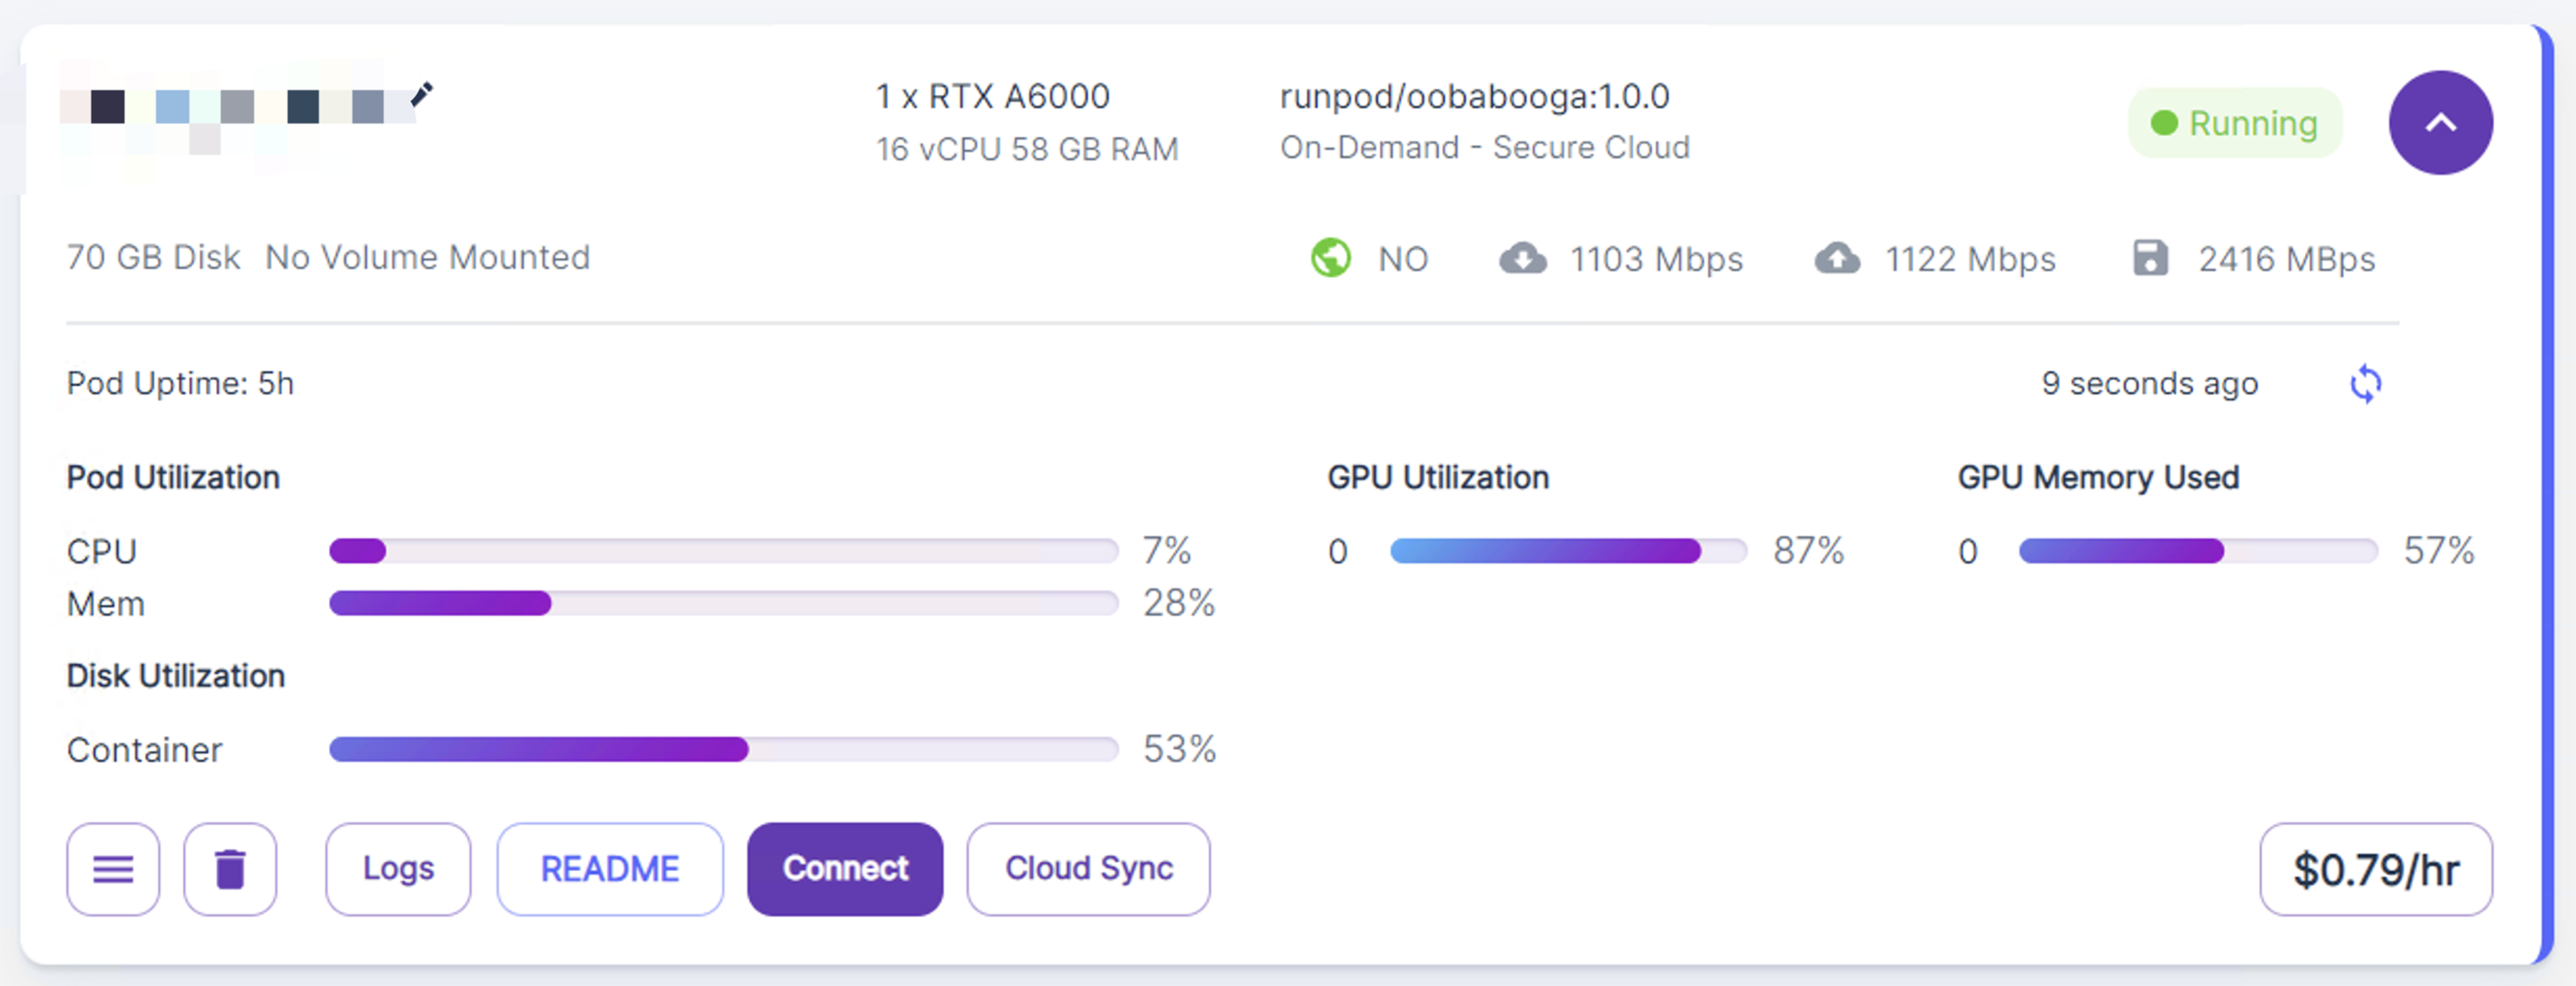

In [1]:
!git clone -b dev https://github.com/utensil/Alpaca-CoT.git code

Cloning into 'code'...
remote: Enumerating objects: 771, done.
remote: Counting objects: 100% (112/112), done.
remote: Compressing objects: 100% (64/64), done.
remote: Total 771 (delta 64), reused 82 (delta 48), pack-reused 659
Receiving objects: 100% (771/771), 127.13 MiB | 21.25 MiB/s, done.
Resolving deltas: 100% (413/413), done.


In [2]:
!python -m pip install bitsandbytes
!python -m pip install datasets
!python -m pip install git+https://github.com/huggingface/transformers.git
!python -m pip install peft
!python -m pip install sentencepiece
!python -m pip install gradio


[notice] A new release of pip is available: 23.0.1 -> 23.1
[notice] To update, run: python -m pip install --upgrade pip

[notice] A new release of pip is available: 23.0.1 -> 23.1
[notice] To update, run: python -m pip install --upgrade pip
  Cloning https://github.com/huggingface/transformers.git to /tmp/pip-req-build-aybwnf6s
  Running command git clone --filter=blob:none --quiet https://github.com/huggingface/transformers.git /tmp/pip-req-build-aybwnf6s
  Resolved https://github.com/huggingface/transformers.git to commit 84a6570e7bce91ba7d18c0782186241c5f1fde75
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for transformers: filename=transformers-4.29.0.dev0-py3-none-any.whl size=6934831 sha256=a89150c4cb678a65adce0abee01082308edfc9159aa7c9846beee88fbc44fad1
  Stored in directory: /tmp/pip-ephem-wheel-cache-2qbv5vto/wheels/e7/9c/5b/e1a9c8007c343041e61cc484433d512ea9274272e3fcbe7c

In [3]:
# https://github.com/ymcui/Chinese-LLaMA-Alpaca/issues/160
!python -m pip install --force-reinstall peft

  Using cached peft-0.2.0-py3-none-any.whl (40 kB)
  Using cached accelerate-0.18.0-py3-none-any.whl (215 kB)
  Using cached numpy-1.24.2-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (17.3 MB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 282.1/282.1 kB 6.5 MB/s eta 0:00:0000:01
  Using cached PyYAML-6.0-cp310-cp310-manylinux_2_5_x86_64.manylinux1_x86_64.manylinux_2_12_x86_64.manylinux2010_x86_64.whl (682 kB)
  Using cached transformers-4.28.1-py3-none-any.whl (7.0 MB)
  Using cached packaging-23.1-py3-none-any.whl (48 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 619.9/619.9 MB 10.1 MB/s eta 0:00:0000:0100:01
  Using cached Jinja2-3.1.2-py3-none-any.whl (133 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 177.1/177.1 MB 24.6 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 173.2/173.2 MB 26.2 MB/s eta 0:00:0000:0100:01
  Using cached typing_extensions-4.5.0-py3-none-any.whl (27 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.5/6.5 MB 70.5 MB/s 

In [4]:
!pip install wandb

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 26.3 MB/s eta 0:00:0000:010:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 199.2/199.2 kB 40.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 302.4/302.4 kB 55.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 184.3/184.3 kB 41.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 15.8 MB/s eta 0:00:00
  Created wheel for pathtools: filename=pathtools-0.1.2-py3-none-any.whl size=8791 sha256=479f8088a9cc5c56259f171255f9768e7b97f3aca5cde00485cbb144df78367a
  Stored in directory: /root/.cache/pip/wheels/e7/f3/22/152153d6eb222ee7a56ff8617d80ee5207207a8c00a7aab794
Successfully built pathtools

[notice] A new release of pip is available: 23.0.1 -> 23.1
[notice] To update, run: python3 -m pip install --upgrade pip


In [6]:
!wandb login

wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc


In [7]:
%env WANDB_PROJECT=Alpaca-CoT

env: WANDB_PROJECT=Alpaca-CoT


In [10]:
# download data git repository
!GIT_LFS_SKIP_SMUDGE=1 git clone https://huggingface.co/datasets/QingyiSi/Alpaca-CoT data

Cloning into 'data'...
remote: Enumerating objects: 2167, done.
remote: Counting objects: 100% (2167/2167), done.
remote: Compressing objects: 100% (2111/2111), done.
remote: Total 2167 (delta 159), reused 1613 (delta 0), pack-reused 0
Receiving objects: 100% (2167/2167), 21.86 MiB | 5.89 MiB/s, done.
Resolving deltas: 100% (159/159), done.


In [11]:
# pull specify data and move it，change <alpaca/> to your preference
!cd /workspace/data && git config core.sparsecheckout true && git config lfs.fetchinclude alpaca/
!cd /workspace/data && git lfs pull
!cp /workspace/data/alpaca/*.json /workspace/code/data/
!ls -lh /workspace/code/data/

total 44Mng LFS objects: 100% (2/2), 46 MB | 18 MB/s                            
-rw-r--r-- 1 root root 22M Apr 19 04:01 alpaca_data.json
-rw-r--r-- 1 root root 22M Apr 19 04:01 alpaca_data_cleaned.json
drwxr-xr-x 2 root root 228 Apr 19 03:57 formatted_cot_data
drwxr-xr-x 2 root root 260 Apr 19 03:57 origin_cot_data


In [12]:
!python3 /workspace/llm-playground/helper/upload.py

Working directory changed to: /workspace/llm-playground/helper/..
/workspace/llm-playground/storage is already a clone of https://huggingface.co/datasets/utensil/storage. Make sure you pull the latest changes with `repo.git_pull()`.
Nothing to upload, exiting...


In [13]:
!cp -r /workspace/llm-playground/storage/saved_models /workspace/code/

In [14]:
!ls /workspace/code/saved_models/llama-7b-hf_alpaca

adapter_config.json  adapter_model.bin	checkpoint-351	checkpoint-390


In [16]:
# instruction finetuning 
!cd /workspace/code && python uniform_finetune.py --model_type llama --model_name_or_path decapoda-research/llama-7b-hf --data alpaca --lora_target_modules q_proj v_proj --per_gpu_train_batch_size 4 --learning_rate 3e-4 --epochs 1 --report_to wandb --resume_from_checkpoint /workspace/code/saved_models/llama-7b-hf_alpaca/checkpoint-390 


===================================BUG REPORT===================================
Welcome to bitsandbytes. For bug reports, please run

python -m bitsandbytes

 and submit this information together with your error trace to: https://github.com/TimDettmers/bitsandbytes/issues
bin /usr/local/lib/python3.10/dist-packages/bitsandbytes/libbitsandbytes_cuda116.so
/usr/local/lib/python3.10/dist-packages/bitsandbytes/cuda_setup/main.py:145: UserWarning: WARNING: The following directories listed in your path were found to be non-existent: {PosixPath('/usr/local/nvidia/lib'), PosixPath('/usr/local/nvidia/lib64')}
  warn(msg)
/usr/local/lib/python3.10/dist-packages/bitsandbytes/cuda_setup/main.py:145: UserWarning: /usr/local/nvidia/lib:/usr/local/nvidia/lib64 did not contain ['libcudart.so', 'libcudart.so.11.0', 'libcudart.so.12.0'] as expected! Searching further paths...
  warn(msg)
/usr/local/lib/python3.10/dist-packages/bitsandbytes/cuda_setup/main.py:145: UserWarning: WARNING: The following di

In [17]:
# instruction finetuning 
!cd /workspace/code && python uniform_finetune.py --model_type llama --model_name_or_path decapoda-research/llama-7b-hf --data alpaca --lora_target_modules q_proj v_proj --per_gpu_train_batch_size 4 --learning_rate 3e-4 --epochs 1 --report_to wandb --resume_from_checkpoint latest


===================================BUG REPORT===================================
Welcome to bitsandbytes. For bug reports, please run

python -m bitsandbytes

 and submit this information together with your error trace to: https://github.com/TimDettmers/bitsandbytes/issues
bin /usr/local/lib/python3.10/dist-packages/bitsandbytes/libbitsandbytes_cuda116.so
/usr/local/lib/python3.10/dist-packages/bitsandbytes/cuda_setup/main.py:145: UserWarning: WARNING: The following directories listed in your path were found to be non-existent: {PosixPath('/usr/local/nvidia/lib64'), PosixPath('/usr/local/nvidia/lib')}
  warn(msg)
/usr/local/lib/python3.10/dist-packages/bitsandbytes/cuda_setup/main.py:145: UserWarning: /usr/local/nvidia/lib:/usr/local/nvidia/lib64 did not contain ['libcudart.so', 'libcudart.so.11.0', 'libcudart.so.12.0'] as expected! Searching further paths...
  warn(msg)
/usr/local/lib/python3.10/dist-packages/bitsandbytes/cuda_setup/main.py:145: UserWarning: WARNING: The following di

In [18]:
# instruction finetuning 
!cd /workspace/code && python uniform_finetune.py --model_type llama --model_name_or_path decapoda-research/llama-7b-hf --data alpaca --lora_target_modules q_proj v_proj --per_gpu_train_batch_size 4 --learning_rate 3e-4 --epochs 1 --report_to wandb --resume_from_checkpoint latest


===================================BUG REPORT===================================
Welcome to bitsandbytes. For bug reports, please run

python -m bitsandbytes

 and submit this information together with your error trace to: https://github.com/TimDettmers/bitsandbytes/issues
bin /usr/local/lib/python3.10/dist-packages/bitsandbytes/libbitsandbytes_cuda116.so
/usr/local/lib/python3.10/dist-packages/bitsandbytes/cuda_setup/main.py:145: UserWarning: WARNING: The following directories listed in your path were found to be non-existent: {PosixPath('/usr/local/nvidia/lib'), PosixPath('/usr/local/nvidia/lib64')}
  warn(msg)
/usr/local/lib/python3.10/dist-packages/bitsandbytes/cuda_setup/main.py:145: UserWarning: /usr/local/nvidia/lib:/usr/local/nvidia/lib64 did not contain ['libcudart.so', 'libcudart.so.11.0', 'libcudart.so.12.0'] as expected! Searching further paths...
  warn(msg)
/usr/local/lib/python3.10/dist-packages/bitsandbytes/cuda_setup/main.py:145: UserWarning: WARNING: The following di

In [24]:
!cd /workspace/llm-playground/storage && git lfs pull

In [25]:
!cp -r /workspace/llm-playground/storage/saved_models /workspace/code/

In [26]:
# instruction finetuning 
!cd /workspace/code && python uniform_finetune.py --model_type llama --model_name_or_path decapoda-research/llama-7b-hf --data alpaca --lora_target_modules q_proj v_proj --per_gpu_train_batch_size 4 --learning_rate 3e-4 --epochs 1 --report_to wandb --resume_from_checkpoint latest


===================================BUG REPORT===================================
Welcome to bitsandbytes. For bug reports, please run

python -m bitsandbytes

 and submit this information together with your error trace to: https://github.com/TimDettmers/bitsandbytes/issues
bin /usr/local/lib/python3.10/dist-packages/bitsandbytes/libbitsandbytes_cuda116.so
/usr/local/lib/python3.10/dist-packages/bitsandbytes/cuda_setup/main.py:145: UserWarning: WARNING: The following directories listed in your path were found to be non-existent: {PosixPath('/usr/local/nvidia/lib'), PosixPath('/usr/local/nvidia/lib64')}
  warn(msg)
/usr/local/lib/python3.10/dist-packages/bitsandbytes/cuda_setup/main.py:145: UserWarning: /usr/local/nvidia/lib:/usr/local/nvidia/lib64 did not contain ['libcudart.so', 'libcudart.so.11.0', 'libcudart.so.12.0'] as expected! Searching further paths...
  warn(msg)
/usr/local/lib/python3.10/dist-packages/bitsandbytes/cuda_setup/main.py:145: UserWarning: WARNING: The following di

Manually deleted the downloaded checkpoints, leaving only checkpoints from today

In [28]:
# instruction finetuning 
!cd /workspace/code && python uniform_finetune.py --model_type llama --model_name_or_path decapoda-research/llama-7b-hf --data alpaca --lora_target_modules q_proj v_proj --per_gpu_train_batch_size 4 --learning_rate 3e-4 --epochs 1 --report_to wandb --resume_from_checkpoint latest


===================================BUG REPORT===================================
Welcome to bitsandbytes. For bug reports, please run

python -m bitsandbytes

 and submit this information together with your error trace to: https://github.com/TimDettmers/bitsandbytes/issues
bin /usr/local/lib/python3.10/dist-packages/bitsandbytes/libbitsandbytes_cuda116.so
/usr/local/lib/python3.10/dist-packages/bitsandbytes/cuda_setup/main.py:145: UserWarning: WARNING: The following directories listed in your path were found to be non-existent: {PosixPath('/usr/local/nvidia/lib64'), PosixPath('/usr/local/nvidia/lib')}
  warn(msg)
/usr/local/lib/python3.10/dist-packages/bitsandbytes/cuda_setup/main.py:145: UserWarning: /usr/local/nvidia/lib:/usr/local/nvidia/lib64 did not contain ['libcudart.so', 'libcudart.so.11.0', 'libcudart.so.12.0'] as expected! Searching further paths...
  warn(msg)
/usr/local/lib/python3.10/dist-packages/bitsandbytes/cuda_setup/main.py:145: UserWarning: WARNING: The following di

In [30]:
!nvidia-smi

Wed Apr 19 05:46:50 2023       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 530.30.02              Driver Version: 530.30.02    CUDA Version: 12.1     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                  Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf            Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  NVIDIA RTX A6000                On | 00000000:00:06.0 Off |                  Off |
| 30%   36C    P8               25W / 300W|  40099MiB / 49140MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [34]:
!ps aux|grep uniform_finetune|awk '{print $2}'|xargs kill -9

kill: (4784): No such process


In [35]:
!nvidia-smi

Wed Apr 19 05:48:21 2023       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 530.30.02              Driver Version: 530.30.02    CUDA Version: 12.1     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                  Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf            Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  NVIDIA RTX A6000                On | 00000000:00:06.0 Off |                  Off |
| 30%   37C    P8               25W / 300W|      1MiB / 49140MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [36]:
!cp -r /workspace/llm-playground/storage/saved_models /workspace/code/

In [37]:
!cd /workspace/code && python uniform_finetune.py --model_type llama --model_name_or_path decapoda-research/llama-7b-hf --data alpaca --lora_target_modules q_proj v_proj --per_gpu_train_batch_size 4 --learning_rate 3e-4 --epochs 2 --report_to wandb --resume_from_checkpoint latest


===================================BUG REPORT===================================
Welcome to bitsandbytes. For bug reports, please run

python -m bitsandbytes

 and submit this information together with your error trace to: https://github.com/TimDettmers/bitsandbytes/issues
bin /usr/local/lib/python3.10/dist-packages/bitsandbytes/libbitsandbytes_cuda116.so
/usr/local/lib/python3.10/dist-packages/bitsandbytes/cuda_setup/main.py:145: UserWarning: WARNING: The following directories listed in your path were found to be non-existent: {PosixPath('/usr/local/nvidia/lib'), PosixPath('/usr/local/nvidia/lib64')}
  warn(msg)
/usr/local/lib/python3.10/dist-packages/bitsandbytes/cuda_setup/main.py:145: UserWarning: /usr/local/nvidia/lib:/usr/local/nvidia/lib64 did not contain ['libcudart.so', 'libcudart.so.11.0', 'libcudart.so.12.0'] as expected! Searching further paths...
  warn(msg)
/usr/local/lib/python3.10/dist-packages/bitsandbytes/cuda_setup/main.py:145: UserWarning: WARNING: The following di

In [38]:
%cd /workspace/llm-playground/

/workspace/llm-playground


In [43]:
!export last_checkpoint=`ls -1 -t /workspace/code/saved_models/llama-7b-hf_alpaca/|head -n 1`
!cp -r /workspace/code/saved_models/llama-7b-hf_alpaca/$last_checkpoint storage/saved_models/llama-7b-hf_alpaca/
!ls -lhta storage/saved_models/llama-7b-hf_alpaca/$last_checkpoint

total 8.0K
drwxr-xr-x 14 root root 326 Apr 19 09:07 llama-7b-hf_alpaca
drwxr-xr-x  5 root root 128 Apr 19 09:07 .
-rw-r--r--  1 root root 443 Apr 19 05:31 adapter_model.bin
drwxr-xr-x  2 root root 160 Apr 19 03:56 checkpoint-390
drwxr-xr-x  2 root root 160 Apr 19 03:56 checkpoint-351
drwxr-xr-x  3 root root  32 Apr 19 03:56 ..
-rw-r--r--  1 root root 350 Apr 19 03:56 adapter_config.json


In [44]:
!cp /workspace/code/saved_models/llama-7b-hf_alpaca/adapter* storage/saved_models/llama-7b-hf_alpaca/
!ls -lhta storage/saved_models/llama-7b-hf_alpaca/

total 17M
-rw-r--r--  1 root root 17M Apr 19 09:08 adapter_model.bin
-rw-r--r--  1 root root 370 Apr 19 09:08 adapter_config.json
drwxr-xr-x 14 root root 326 Apr 19 09:07 llama-7b-hf_alpaca
drwxr-xr-x  5 root root 128 Apr 19 09:07 .
drwxr-xr-x  2 root root 160 Apr 19 03:56 checkpoint-390
drwxr-xr-x  2 root root 160 Apr 19 03:56 checkpoint-351
drwxr-xr-x  3 root root  32 Apr 19 03:56 ..


In [45]:
%autosave 1

Autosaving every 1 seconds


In [46]:
!sleep 10

In [ ]:
!cp /workspace/test_resume.ipynb storage/saved_models/llama-7b-hf_alpaca/

In [ ]:
!python3 /workspace/llm-playground/helper/upload.py

In [ ]:
sleep 30 && runpodctl remove pod $RUNPOD_POD_ID